**MNSIT** (Modified Nation Institute of Standards and Technology) is the most commonly used dataset for Digit recognition for Deep Learning because of its tens of thousands of handwritten images. it has total of 784 pixels each of 28 pixels in height and 28 pixels in width representing lightness or darkness of the picture


In [1]:
#installing the latest version of tensorflow
pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 3.9MB 24.1MB/s 
     |████████████████████████████████| 450kB 51.3MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
# verify for the verion updated
!pip show tensorflow

Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, scipy, protobuf, six, astor, absl-py, opt-einsum, grpcio, keras-applications, tensorflow-estimator, numpy, tensorboard, termcolor, gast, wheel, wrapt, google-pasta
Required-by: stable-baselines, magenta, fancyimpute


**Importing, Normalizing and Defining the layers** 

In [3]:
# Importing the required libraries
import tensorflow as tf


# Import MNIST data
mnist = tf.keras.datasets.mnist

# Creating training and testing datasets
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#Normalizing the datasets
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)
y_train, y_test = tf.cast(y_train, tf.int64), tf.cast(y_test, tf.int64)

# Defining a Sequential Model
model = tf.keras.models.Sequential()

#Defining layers of the model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

11493376/11490434 [==============================] - 0s 0us/step


**Compiling the Model**

In [0]:
#Compiling the Model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

In [5]:
#Training the Model
history = model.fit(x_train, y_train, batch_size=32, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.5909 - accuracy: 0.8453
Epoch 2/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2836 - accuracy: 0.9195
Epoch 3/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2309 - accuracy: 0.9346
Epoch 4/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1964 - accuracy: 0.9448
Epoch 5/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.1716 - accuracy: 0.9514
Epoch 6/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.1523 - accuracy: 0.9565
Epoch 7/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.1366 - accuracy: 0.9613
Epoch 8/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.1237 - accuracy: 0.9655
Epoch 9/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.1130 - accuracy: 0.9

**Evaluating the Model**

In [6]:
#Evaluating the Model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.1139 - accuracy: 0.9671


[0.11385353811830282, 0.9671]

**Predicting using the Model**

In [7]:
#Making Prediction using the Model
import numpy as np
x_new = x_test[:10]
y_pred = model.predict_classes(x_new)
print(y_pred)
#np.array(class_names)[y_red]
y_new = y_test[:10]
y_new

[7 2 1 0 4 1 4 9 6 9]


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])>

**Ploting Accuracy and Loss** 

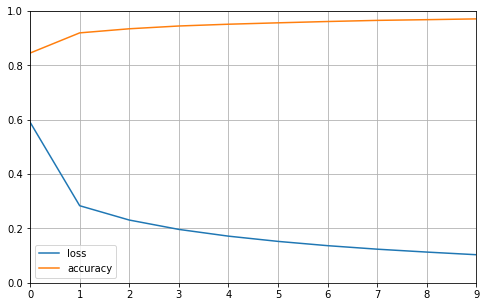

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()